# Data analysis
Import the necessary libraries and read the data to dataframe

numpy https://www.numpy.org/

pandas https://pandas.pydata.org/

matplotlib https://matplotlib.org/

sklearn https://scikit-learn.org/

seaborn https://seaborn.pydata.org/

colab https://colab.research.google.com/notebooks/welcome.ipynb

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving Data TP2.csv to Data TP2.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Data TP2.csv']))

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Treat missing values

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending = False, inplace=True)
missing_value_df

,column_name,percent_missing
Cabin,Cabin,77.104377
Age,Age,19.865320
Embarked,Embarked,0.224467
PassengerId,PassengerId,0.000000
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Name,Name,0.000000
Sex,Sex,0.000000
SibSp,SibSp,0.000000
Parch,Parch,0.000000


In [ ]:
print("length of dataframe without rows where all values are NA is {} \n that represents {} of initial dataset \n".format(len(data.dropna(how="all").index),len(data.dropna(how="all").index)/len(data.index)))
print("length of dataframe without rows where at least one value is NA is {} \n that represents {} of initial dataset".format(len(data.dropna(how="any").index),len(data.dropna(how="any").index)/len(data.index)))

length of dataframe without rows where all values are NA is 891 
 that represents 1.0 of initial dataset 

length of dataframe without rows where at least one value is NA is 183 
 that represents 0.2053872053872054 of initial dataset


In [ ]:
data.drop(['Cabin', 'Embarked'], axis=1, inplace=True)

## Visualize datasets and features relathionships

<AxesSubplot:>

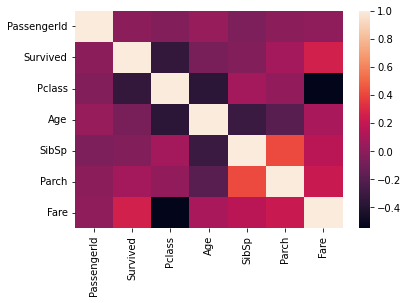

In [ ]:
import seaborn as sns
corr = data.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

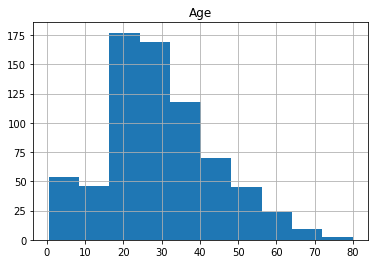

In [ ]:
data[['Age']].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

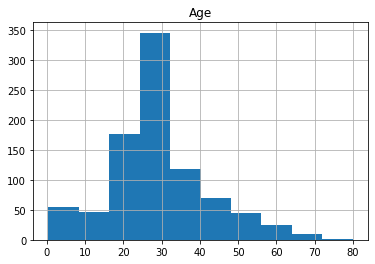

In [ ]:
data[['Age']].fillna(data['Age'].median()).hist()


array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

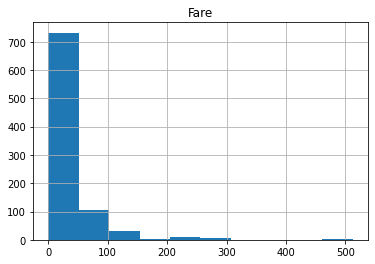

In [ ]:
data[['Fare']].hist()

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

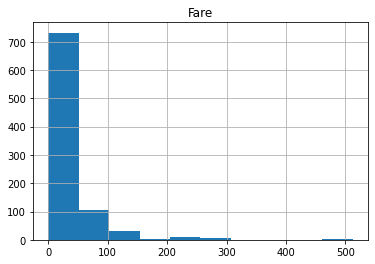

In [ ]:
data[['Fare']].fillna(data['Fare'].median()).hist()
 # ca sert à rien car il n'y a pas de valeur vide

In [ ]:
data['Fare'] = data['Fare'].fillna(data['Fare'].median())
data['Age'] = data['Age'].fillna(data['Age'].median())

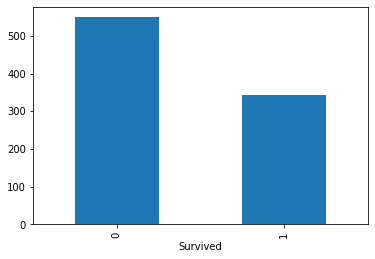

In [ ]:
data.groupby('Survived').Survived.count().plot.bar()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


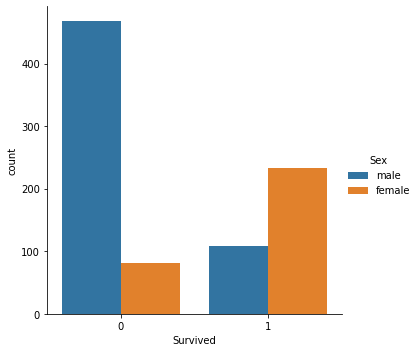

In [ ]:
sns.factorplot('Survived',data=data,kind='count',hue='Sex')

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


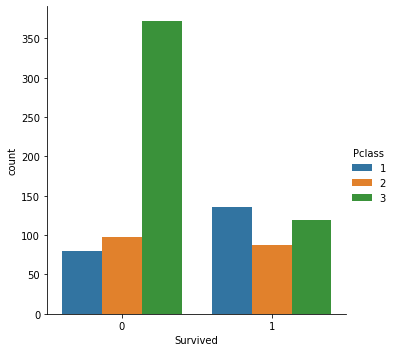

In [ ]:
sns.factorplot('Survived',data=data,kind='count',hue='Pclass')

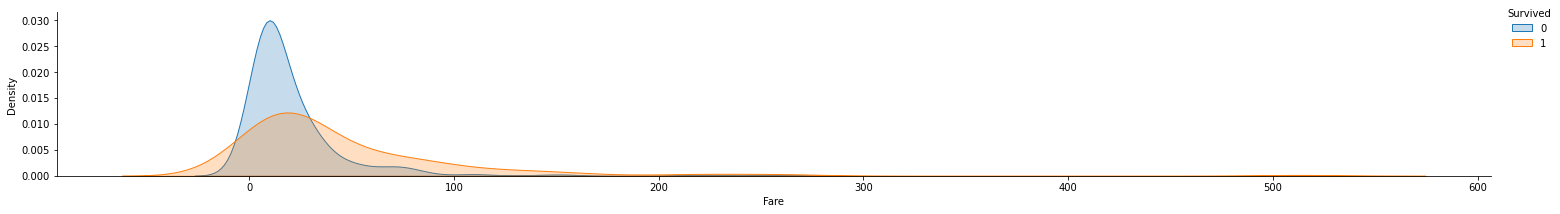

In [ ]:
ax = sns.FacetGrid(data,hue='Survived',aspect=7)
ax.map(sns.kdeplot,'Fare',shade=True)
ax.add_legend(loc='upper right')

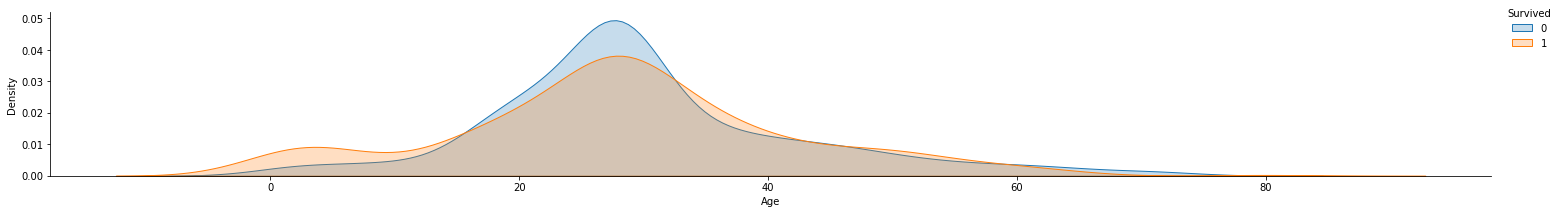

In [ ]:
ax = sns.FacetGrid(data,hue='Survived',aspect=7)
ax.map(sns.kdeplot,'Age',shade=True)
ax.add_legend(loc='upper right')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


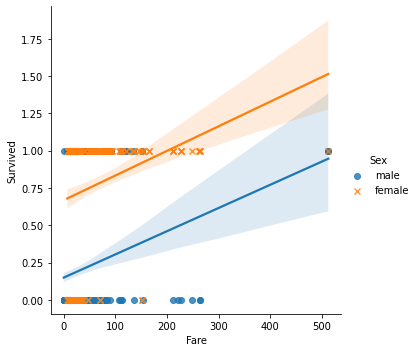

In [ ]:
sns.lmplot('Fare','Survived',data=data,hue='Sex',markers=["o", "x"])
# on observe mieux la corrélation entre le prix payés et la survabilité

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


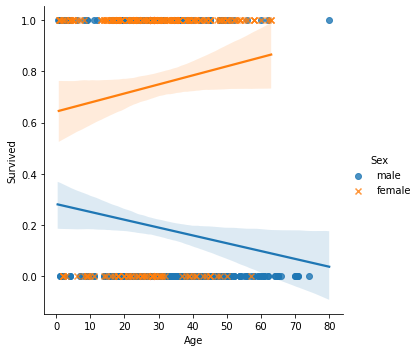

In [ ]:
sns.lmplot('Age','Survived',data=data,hue='Sex',markers=["o", "x"])
# plus précis que les graphs du dessus car en la survivabilité des femmes agées compense la non survabilité des hommes agés

#Preprocessing data for machine learning

In [ ]:
sex_lookup={'male':1, 'female':2}
data.Sex=data.Sex.map(sex_lookup)
# remplace male par 1 et female par 2 dans la colonne Sex du tableau data

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,28.0,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000


In [ ]:
features = data[['Sex', 'Pclass','Fare', 'SibSp', 'Parch','Age']]
target = data['Survived']

## Builiding preprocessing pipeline

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

one_hot_preprocessor = OneHotEncoder(handle_unknown="ignore")

standard_scaling_preprocessor = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', one_hot_preprocessor, ['Sex', 'Pclass']),
    ('standard_scaler', standard_scaling_preprocessor, ['Fare', 'Parch','Age'])])

In [ ]:
preprocessor2 = ColumnTransformer([
    ('standard_scaler', standard_scaling_preprocessor, ['Fare', 'Parch','Age'])])

## Splitting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    features, target)

# Unsupervised learning with k-means 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

kmeans = KMeans(n_clusters=2, max_iter=100)
kmeans_model = make_pipeline(preprocessor, kmeans)

In [ ]:
from sklearn import set_config
set_config(display='diagram')
kmeans_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'SibSp', 'Parch',
                                                   'Age'])])),
                ('kmeans', KMeans(max_iter=100, n_clusters=2))])

In [ ]:
kmeans_model.named_steps

{'columntransformer': ColumnTransformer(transformers=[('one-hot-encoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  ['Sex', 'Pclass']),
                                 ('standard_scaler', StandardScaler(),
                                  ['Fare', 'SibSp', 'Parch', 'Age'])]),
 'kmeans': KMeans(max_iter=100, n_clusters=2)}

In [ ]:
kmeans_model.fit(x_train)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'SibSp', 'Parch',
                                                   'Age'])])),
                ('kmeans', KMeans(max_iter=100, n_clusters=2))])

In [ ]:
train_transformed_data = kmeans_model.named_steps['columntransformer'].transform(x_train)

In [ ]:
kmeans.cluster_centers_

array([[ 0.4173913 ,  0.5826087 ,  0.19130435,  0.23478261,  0.57391304,
         0.5970449 ,  1.15930664,  1.72726979, -0.86919422],
       [ 0.69981917,  0.30018083,  0.23327306,  0.19168174,  0.57504521,
        -0.12415943, -0.24108547, -0.35919715,  0.18075468]])

In [ ]:
prediction = kmeans_model.predict(x_test)

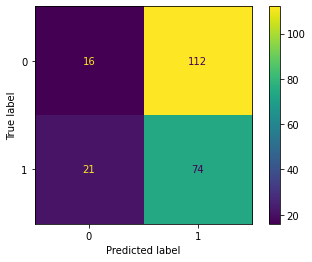

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
compare_df = y_test.copy().reset_index().drop(['index'], axis=1)

In [ ]:
prediction_df = pd.DataFrame(prediction, columns=["Prediction"])

In [ ]:
compare_df['true'] = np.where(compare_df['Survived'] == prediction_df["Prediction"], 1, 0)
print("Classification accuracy = {}".format(compare_df['true'].sum()/compare_df['true'].size))
print(compare_df['true'].sum())
print(compare_df['true'].size)

Classification accuracy = 0.40358744394618834
90
223


# Supervised learning with decision tree

In [ ]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(max_depth=2)

In [ ]:
tree_model = make_pipeline(preprocessor2, decision_tree)

In [ ]:
tree_model.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'Parch', 'Age'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2))])

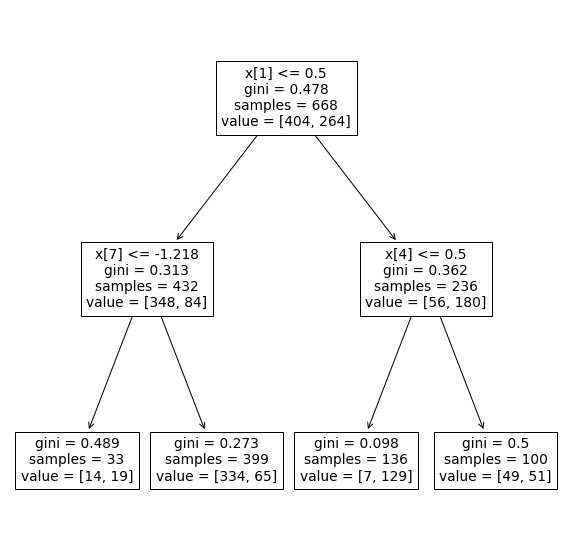

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(decision_tree)
plt.show()
#même que juste en dessous

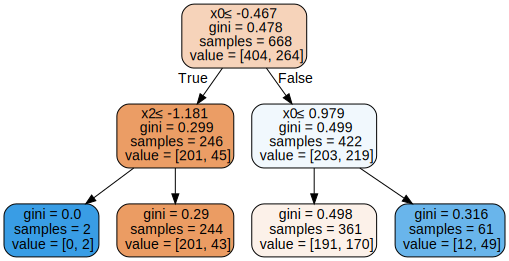

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(decision_tree, out_file=None,
filled=True, rounded=True,  
special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#Supervised learning with Random Forest

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


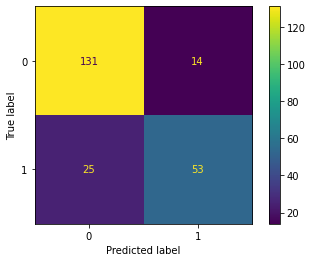

In [ ]:
# 1 => 9; 77 =>one hot encoder => 12
# 2 => 8; 96 =>sans one hot => 26
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion='entropy', 
                             n_estimators=77,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                            max_depth=9
                          )
random_forest_model = make_pipeline(preprocessor, random_forest)
random_forest_model.fit(x_train,y_train)
prediction_rf=random_forest_model.predict(x_test)
cm=confusion_matrix(y_test, prediction_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#new


In [ ]:
random_forest_model = make_pipeline(preprocessor, random_forest)

In [ ]:
random_forest_model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'Parch', 'Age'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=6,
                                        max_features='auto',
                                        min_samples_split=10,
                                        oob_score=True))])

In [ ]:
prediction_rf=random_forest_model.predict(x_test)

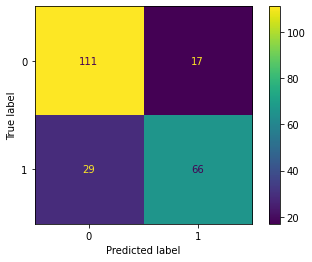

In [ ]:
cm=confusion_matrix(y_test, prediction_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#old

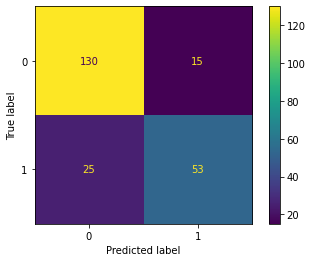

In [ ]:
cm=confusion_matrix(y_test, prediction_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
#new

In [ ]:
prediction_rf_df = pd.DataFrame(prediction_rf, columns=["Prediction"])
compare_df['true'] = np.where(compare_df['Survived'] == prediction_rf_df["Prediction"], 1, 0)
print("Classification accuracy = {}".format(compare_df['true'].sum()/compare_df['true'].size))
print(compare_df['true'].sum())
print(compare_df['true'].size)

Classification accuracy = 0.6098654708520179
136
223


In [ ]:
from sklearn.metrics import average_precision_score,  recall_score

y_score = random_forest_model.predict_proba(x_test)
print("average precision = {}".format(average_precision_score(y_test.to_numpy(), y_score[:,1])))
print("average recall = {}".format(recall_score(y_test.to_numpy(), prediction_rf)))

average precision = 0.8036486290537276
average recall = 0.6538461538461539


#Find the best set of hyper-parameters with grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [70,80,90,100,110,120,130],
    'max_depth' : [8,9,10,11,12,13,14]
}
grid_searcher = GridSearchCV(random_forest, param_grid, cv= 5, refit=False)
grid_search_model = make_pipeline(preprocessor2, grid_searcher)
grid_search_model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'Parch', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(criterion='entropy',
                                                               max_depth=9,
                                                               max_features='auto',
                                                               min_samples_split=10,
                                                               n_estimators=77,
                                                               oob_score=True),
                              param_grid={'max_depth': [8, 9, 10, 11, 12, 13,
                                                        14],
                                          'n_estimators': [70, 80, 90, 100, 110,
                                                           120, 130]},
                              refit=False))])

In [ ]:
grid_search_model.fit(x_train, y_train)
#collé au dessus

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Pclass']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'Parch', 'Age'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(criterion='entropy',
                                                               max_depth=8,
                                                               max_features='auto',
                                                               min_samples_split=10,
                                                               n_estimators=75,
                                                               oob_score=True),
                              param_grid={'max_depth': [6, 7, 8, 9, 10],
                                          'n_estimators': [50, 75, 100, 125,
                                                           150, 200]},
                              refit=False))])

In [ ]:
#grid_search_model.named_steps
#grid_search_model.named_steps["gridsearchcv"].cv_results_
grid_search_model.named_steps["gridsearchcv"].best_params_

{'max_depth': 8, 'n_estimators': 100}

In [ ]:
grid_search_model.named_steps["gridsearchcv"].cv_results_
# deja collé au dessus

{'mean_fit_time': array([0.23524389, 0.44726253, 0.38500071, 0.47422504, 0.55912228,
        0.89620657, 0.19254227, 0.2915875 , 0.37905717, 0.4788198 ,
        0.63806596, 0.82778502, 0.18859472, 0.29600263, 0.38463516,
        0.5465795 , 0.63505816, 0.75304604, 0.19431853, 0.2974339 ,
        0.53219185, 0.5040143 , 0.57300267, 0.75535712, 0.27763376,
        0.37382979, 0.38923368, 0.47529593, 0.56968117, 0.90742011]),
 'std_fit_time': array([0.09967488, 0.05032608, 0.01284706, 0.00244443, 0.01509855,
        0.173712  , 0.00812379, 0.00803555, 0.00733302, 0.00876393,
        0.15675407, 0.144632  , 0.01068697, 0.02552163, 0.01408003,
        0.13245814, 0.16233237, 0.0159148 , 0.00816193, 0.0120109 ,
        0.1116986 , 0.0238199 , 0.02031305, 0.01735785, 0.06963145,
        0.08421602, 0.01410615, 0.01429433, 0.0063093 , 0.19769199]),
 'mean_score_time': array([0.01323924, 0.0288095 , 0.02531204, 0.02960792, 0.03378935,
        0.05540338, 0.01254587, 0.01744967, 0.02465801, 0.02

In [ ]:
grid_search_model.named_steps["gridsearchcv"].best_params_
#deja collé au dessus

{'max_depth': 10, 'n_estimators': 75}